In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

Import stata datasets, dont convert categoricals, order them and preserve the data types eg int, bool

In [5]:

data = pd.read_stata("STATA\\auto.dta", convert_categoricals=True, order_categoricals=True,  preserve_dtypes=True) 
data.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


In [6]:
data.fillna(method='ffill', inplace=True)
data.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,3.0,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


In [62]:
feature_cols=data[['mpg', 'rep78', 'headroom','trunk', 'length','turn', 'displacement','gear_ratio']]
X=feature_cols

In [63]:
X.shape

(74, 8)

In [64]:
y=data['foreign']
y.shape

(74,)

In [65]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [66]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=22, test_size=.2)

In [67]:
type (y_train)

pandas.core.series.Series

In [68]:
y_train.shape

(59,)

In [70]:
#from sklearn.linear_model import LinearRegression
#LinearRegression
from sklearn.linear_model import LogisticRegression

In [72]:
#linreg=LinearRegression()
#linreg.fit(X_train, y_train)
logreg=LogisticRegression()
logreg.fit(X_train, y_train)


c:\users\colli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
logreg.intercept_

array([0.0942593])

In [76]:
logreg.coef_

array([[-0.14588566,  1.22517804,  0.43473175, -0.02155264,  0.0964746 ,
        -0.45493585, -0.05337282,  1.35122723]])

In [77]:
zip(feature_cols, linreg.coef_)

In [79]:
y_pred=logreg.predict(X_test)
y_pred

array(['Domestic', 'Domestic', 'Foreign', 'Domestic', 'Domestic',
       'Domestic', 'Foreign', 'Domestic', 'Foreign', 'Domestic',
       'Domestic', 'Domestic', 'Foreign', 'Domestic', 'Domestic'],
      dtype=object)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
y_test.value_counts()

Domestic    10
Foreign      5
Name: foreign, dtype: int64

In [82]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y_test, y_pred)

array([[10,  0],
       [ 1,  4]], dtype=int64)

In [60]:
df["mean_head"] = df.groupby('foreign')["headroom"].transform('sum')
df.sort_values(by='make', ascending=True).head()

NameError: name 'df' is not defined

In [61]:
df.columns[::-1] #reversed from end to first and view the row 

NameError: name 'df' is not defined

In [69]:
df.index[1:] #view row indices

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73],
           dtype='int64')

In [235]:
df.rename(columns={'trunk': 'trrnks', 'weight': 'wghts' }, inplace=True)

In [236]:
categoricals = "foreign"
dummies = pd.get_dummies(df[categoricals])
dummies =pd.concat([df, dummies], axis=1)
dummies.drop(['foreign'], axis=1, inplace=True) #drop foreign variable from dataframe
dummies.head()

,make,price,mpg,rep78,headroom,trrnks,wghts,length,turn,displacement,gear_ratio,Domestic,Foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,1,0
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,1,0
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,1,0
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,1,0
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,1,0


In [237]:
#summary statistics on continuous vars
conts = ['price', 'mpg', 'rep78', 'headroom', 'trrnks',
         'wghts', 'length', 'turn', 'displacement', 'gear_ratio']
df[conts].describe()

,price,mpg,rep78,headroom,trrnks,wghts,length,turn,displacement,gear_ratio
count,74.000000,74.000000,69.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,6165.256757,21.297297,3.405797,2.993243,13.756757,3019.459459,187.932432,39.648649,197.297297,3.014865
std,2949.495885,5.785503,0.989932,0.845995,4.277404,777.193567,22.266340,4.399354,91.837219,0.456287
min,3291.000000,12.000000,1.000000,1.500000,5.000000,1760.000000,142.000000,31.000000,79.000000,2.190000
25%,4220.250000,18.000000,3.000000,2.500000,10.250000,2250.000000,170.000000,36.000000,119.000000,2.730000
50%,5006.500000,20.000000,3.000000,3.000000,14.000000,3190.000000,192.500000,40.000000,196.000000,2.955000
75%,6332.250000,24.750000,4.000000,3.500000,16.750000,3600.000000,203.750000,43.000000,245.250000,3.352500
max,15906.000000,41.000000,5.000000,5.000000,23.000000,4840.000000,233.000000,51.000000,425.000000,3.890000


# Determining the Number of Ks to Include

In [29]:
filled =dummies.fillna(0)
filled

,make,price,mpg,rep78,headroom,trrnks,wghts,length,turn,displacement,gear_ratio,0,1
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,1,0
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,1,0
2,AMC Spirit,3799,22,0.0,3.0,12,2640,168,35,121,3.08,1,0
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,1,0
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,1,0
5,Buick LeSabre,5788,18,3.0,4.0,21,3670,218,43,231,2.73,1,0
6,Buick Opel,4453,26,0.0,3.0,10,2230,170,34,304,2.87,1,0
7,Buick Regal,5189,20,3.0,2.0,16,3280,200,42,196,2.93,1,0
8,Buick Riviera,10372,16,3.0,3.5,17,3880,207,43,231,2.93,1,0
9,Buick Skylark,4082,19,3.0,3.5,13,3400,200,42,231,3.08,1,0


In [92]:
Sum_of_squared_distances = []
K = range(1,18)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(filled)
    Sum_of_squared_distances.append(km.inertia_)
filled.head()

NameError: name 'filled' is not defined

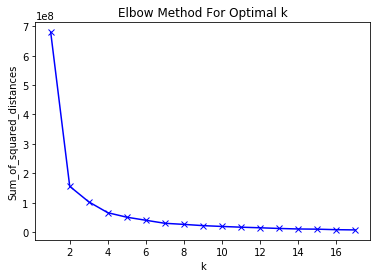

In [270]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#In this case, the optimal number seems like 3

In [285]:
cols = filled.columns[1:]
cols

Index(['mpg', 'rep78', 'headroom', 'trrnks', 'wghts', 'length', 'turn',
       'displacement', 'gear_ratio', 'Domestic', 'Foreign', 'cluster'],
      dtype='object')

# K-Mean Clustering

In [273]:

#refer to manual of optimal k to include
cluster = KMeans(n_clusters=3)

In [279]:
#we create new colums, put values from col 2 onward
#the algorithm looks down the row and puts patient in cluster
filled["cluster"] = cluster.fit_predict(filled[filled.columns[1:]])
filled.tail()

,price,mpg,rep78,headroom,trrnks,wghts,length,turn,displacement,gear_ratio,Domestic,Foreign,cluster
69,7140,23,4.0,2.5,12,2160,172,36,97,3.74,0,1,0
70,5397,41,5.0,3.0,15,2040,155,35,90,3.78,0,1,0
71,4697,25,4.0,3.0,15,1930,155,35,89,3.78,0,1,0
72,6850,25,4.0,2.0,16,1990,156,36,97,3.78,0,1,0
73,11995,17,5.0,2.5,14,3170,193,37,163,2.98,0,1,1


In [292]:
#We now do a PCA analysis to give a 2 dimenensional picture
pca = PCA(n_components = 2)

In [293]:
filled['x'] = pca.fit_transform(filled[cols])[:,0]
filled['y'] = pca.fit_transform(filled[cols])[:,1]
filled = filled.reset_index()
filled

ValueError: cannot insert level_0, already exists

In [294]:
price_clusters = filled[['price', 'cluster', 'x', 'y']]
price_clusters

,price,cluster,x,y
0,4099,1,-97.031751,-66.438559
1,4749,1,334.580275,25.903396
2,3799,0,-385.804189,-35.687174
3,4816,1,229.263269,-25.622600
4,7827,2,1071.297888,39.921640
5,5788,1,651.081167,-35.282097
6,4453,0,-774.048855,189.279113
7,5189,1,259.200190,-28.841678
8,10372,2,859.528335,-57.145462
9,4082,1,382.168221,-6.642130


In [296]:
final = pd.merge(price_clusters, df)
final.tail()

,price,cluster,x,y,make,mpg,rep78,headroom,trrnks,wghts,length,turn,displacement,gear_ratio,foreign
69,7140,0,-865.363306,-9.262329,VW Dasher,23,4.0,2.5,12,2160,172,36,97,3.74,Foreign
70,5397,0,-985.943830,-3.226426,VW Diesel,41,5.0,3.0,15,2040,155,35,90,3.78,Foreign
71,4697,0,-1095.296284,7.230415,VW Rabbit,25,4.0,3.0,15,1930,155,35,89,3.78,Foreign
72,6850,0,-1034.776501,8.871796,VW Scirocco,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign
73,11995,1,146.175457,-50.027762,Volvo 260,17,5.0,2.5,14,3170,193,37,163,2.98,Foreign


In [307]:
#plot with plotly
trace0 = go.Scatter(x = price_clusters[price_clusters.cluster == 0]['x'],
                  y = price_clusters[price_clusters.cluster == 0]['y'],
                  name = "Cluster 1",
                  mode = "markers",
                  marker = dict(size = 10,
                               color ="rgba(15, 152, 152, 0.5)",
                               line =dict(width=1, color = "rgb(0,0,0)")))
trace1 = go.Scatter(x = price_clusters[price_clusters.cluster == 1]['x'],
                  y = price_clusters[price_clusters.cluster == 1]['y'],
                  name = "Cluster 2",
                  mode = "markers",
                  marker = dict(size = 10,
                               color ="rgba(132, 132, 132, 0.8)",
                               line =dict(width=1, color = "rgb(0,0,0)")))
trace2 = go.Scatter(x = price_clusters[price_clusters.cluster == 2]['x'],
                  y = price_clusters[price_clusters.cluster == 2]['y'],
                  name = "Cluster 3",
                  mode = "markers",
                  marker = dict(size = 10,
                               color ="rgba(122, 122, 12, 0.8)",
                               line =dict(width=1, color = "rgb(0,0,0)")))
trace2 = go.Scatter(x = price_clusters[price_clusters.cluster == 3]['x'],
                  y = price_clusters[price_clusters.cluster == 3]['y'],
                  name = "Cluster 4",
                  mode = "markers",
                  marker = dict(size = 10,
                               color ="rgba(230, 10, 30, 0.5",
                               line =dict(width=1, color = "rgb(0,0,0)")))
data=[trace0, trace1, trace2]
iplot(data)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of scatter.marker
        Received value: 'rgba(230, 10, 30, 0.5'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, saddlebrown, salmon, sandybrown,
            seagreen, seashell, sienna, silver, skyblue,
            slateblue, slategray, slategrey, snow, springgreen,
            steelblue, tan, teal, thistle, tomato, turquoise,
            violet, wheat, white, whitesmoke, yellow,
            yellowgreen
      - A number that will be interpreted as a color
        according to scatter.marker.colorscale
      - A list or array of any of the above